**Face Emotion Recognition with Transfer Learning**

In [1]:
import cv2

In [2]:
from deepface import DeepFace

In [3]:
img=cv2.imread('happy.jpg')

In [4]:
import matplotlib.pyplot as plt

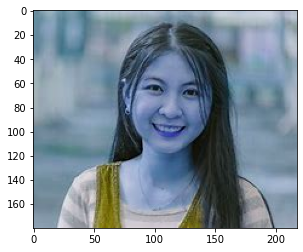

In [5]:
plt.imshow(img)

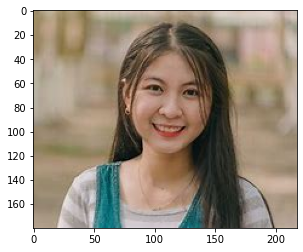

In [6]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [10]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [12]:
print(img_array)

[[[163 163 163]
  [128 128 128]
  [114 114 114]
  ...
  [139 139 139]
  [141 141 141]
  [134 134 134]]

 [[147 147 147]
  [114 114 114]
  [102 102 102]
  ...
  [142 142 142]
  [138 138 138]
  [138 138 138]]

 [[112 112 112]
  [106 106 106]
  [ 92  92  92]
  ...
  [140 140 140]
  [141 141 141]
  [134 134 134]]

 ...

 [[139 139 139]
  [141 141 141]
  [136 136 136]
  ...
  [154 154 154]
  [171 171 171]
  [191 191 191]]

 [[140 140 140]
  [133 133 133]
  [120 120 120]
  ...
  [138 138 138]
  [146 146 146]
  [158 158 158]]

 [[136 136 136]
  [134 134 134]
  [113 113 113]
  ...
  [146 146 146]
  [144 144 144]
  [144 144 144]]]


In [13]:
img_array.shape

(48, 48, 3)

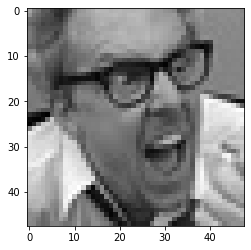

In [14]:
plt.imshow(img_array)

In [15]:
Datadirectory="Training/" # training dataset

In [16]:
Classes=["0","1","2","3","4","5","6"] ## list of classes

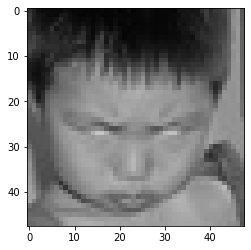

In [17]:
for category in Classes:
    path=os.path.join(Datadirectory,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break   

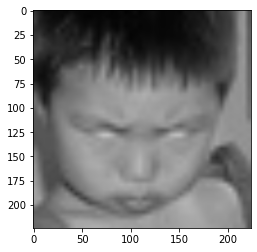

In [18]:
img_size=224 ## imagenet=>224 X 224
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))

In [19]:
new_array.shape

(224, 224, 3)

In [20]:
#read all the images and convert them into array
training_Data=[] ##data array

def create_training_Data():
    for category in Classes:
        path=os.path.join(Datadirectory,category)
        class_num=Classes.index(category) ##0 1, ##Label
    for img in os.listdir(path):
        try:
            img_array=cv2.imread(os.path.join(path,img))
            new_array=cv2.resize(img_array,(img_size,img_size))
            training_Data.append([new_array,class_num])
        except Exception as e:
            pass   
    

In [21]:
create_training_Data()

In [22]:
print(len(training_Data))

3171


In [23]:
temp=np.array(training_Data)

In [24]:
temp.shape

(3171, 2)

In [25]:
import random
random.shuffle(training_Data)

In [26]:
X=[] ##data/feature
y=[] ##Label
for features,label in training_Data:
    X.append(features)
    y.append(label)
    
X=np.array(X).reshape(-1,img_size,img_size,3)  ##converting it to 4 dimension  

In [27]:
X.shape

(3171, 224, 224, 3)

In [28]:
#normalise the data
X=X/255.0; 

In [29]:
type(y)

list

In [30]:
y[0] 

6

In [31]:
Y=np.array(y)

In [32]:
Y.shape

(3171,)

**Deep learning model for training-Transfer Learning**

In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [34]:
model=tf.keras.applications.MobileNetV2() ##pre-trained model

In [35]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [36]:
#transfer learnig- tuning,weights will start from last check point
base_input=model.layers[0].input

In [37]:
base_output=model.layers[-2].output

In [38]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [39]:
final_output=layers.Dense(128)(base_output)  ##adding new layer , after the output of global pooling layer
final_output=layers.Activation('relu')(final_output)  ## activation function
final_output=layers.Dense(64)(final_output)
final_output=layers.Activation('relu')(final_output)
final_output=layers.Dense(7,activation='sigmoid')(final_output)  ## myclasses are 07

In [40]:
final_output ##output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [41]:
new_model=keras.Model(inputs=base_input,outputs=final_output)

In [42]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [43]:
new_model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [39]:
new_model.fit(X,Y,epochs=25) ##training

Epoch 1/25
100/100 [==============================] - 947s 9s/step - loss: 0.0444 - accuracy: 0.9877
Epoch 2/25
100/100 [==============================] - 806s 8s/step - loss: 2.4892e-06 - accuracy: 1.0000
Epoch 3/25
100/100 [==============================] - 1034s 10s/step - loss: 1.0459e-06 - accuracy: 1.0000
Epoch 4/25
100/100 [==============================] - 773s 8s/step - loss: 5.3999e-07 - accuracy: 1.0000
Epoch 5/25
100/100 [==============================] - 823s 8s/step - loss: 3.8420e-07 - accuracy: 1.0000
Epoch 6/25
100/100 [==============================] - 862s 9s/step - loss: 2.9428e-07 - accuracy: 1.0000
Epoch 7/25
100/100 [==============================] - 763s 8s/step - loss: 2.4033e-07 - accuracy: 1.0000
Epoch 8/25
100/100 [==============================] - 701s 7s/step - loss: 1.7872e-07 - accuracy: 1.0000
Epoch 9/25
100/100 [==============================] - 720s 7s/step - loss: 1.4755e-07 - accuracy: 1.0000
Epoch 10/25
100/100 [==============================] - 77

In [44]:
new_model.save('final_model.h5')

In [45]:
new_model=tf.keras.models.load_model('final_model.h5')

In [46]:
frame=cv2.imread('surprise.jpg')

In [47]:
frame.shape

(516, 612, 3)

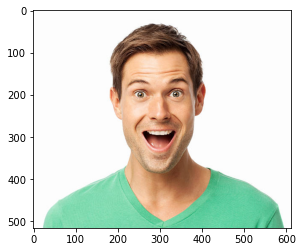

In [48]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [49]:
#face detection algorithm(gray image)
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+"haarcascade_frontalface_default.xml")

In [50]:
gray=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)

In [51]:
faces=faceCascade.detectMultiScale(gray,1.1,4)
for(x,y,w,h) in faces:
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=frame[y:y+h,x:x+w]
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    facess=faceCascade.detectMultiScale(roi_gray)
    if(len(faces)==0):
        print("Face not detected")
    else:
        for(ex,ey,ew,eh)in facess:
            face_roi=roi_color[ey:ey+eh,ex:ex+ew]

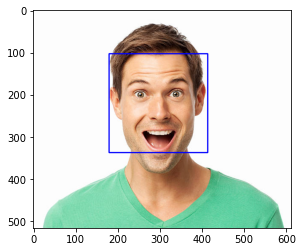

In [52]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

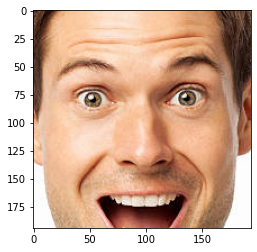

In [53]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

In [54]:
final_image=cv2.resize(face_roi,(224,224))
final_image=np.expand_dims(final_image,axis=0) ##need fourth dimension
final_image=final_image/255.0 ## normalising

In [55]:
Predictions=new_model.predict(final_image)

In [56]:
Predictions[0]

array([0.55676866, 0.47403097, 0.3790468 , 0.39008564, 0.62708133,
       0.5300331 , 0.5042919 ], dtype=float32)

In [57]:
np.argmax(Predictions)

4

**Real-Time-Face-Emotion-Recognition**

In [ ]:
import cv2
import numpy as np
path="haarcascade_frontalface_default.xml"
font_scale=1.5
font=cv2.FONT_HERSHEY_PLAIN

# set the rectangle background to white
rectangle_bgr=(255,255,255)
# make black image
img=np.zeros((500,500))
# set some text
text="Some text in a box!"
# get the width and height of the text box
(text_width,text_height)=cv2.getTextSize(text,font,fontScale=font_scale,thickness=1)[0]
# set the text start position
text_offset_x=10
text_offset_y=img.shape[0]-25
# make the coords of the box with the small padding of two pixels
box_coords=((text_offset_x,text_offset_y),(text_offset_x + text_width + 2,text_offset_y -text_height-2))
cv2.rectangle(img,box_coords[0],box_coords[1],rectangle_bgr,cv2.FILLED)
cv2.putText(img,text,(text_offset_x,text_offset_y),font,fontScale=font_scale,color=(0,0,0),thickness=1)

cap=cv2.VideoCapture(1)
# Check if the webcam is opened correctly
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot Open Webcam")
    
while True:
    ret,frame=cap.read() ## read one image from video
    faceCascade= cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')
    gray=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces=faceCascade.detectMultiScale(gray,1.1,4)
    
    # Draw a rectangle around the faces
    for(x,y,w,h) in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=frame[y:y+h,x:x+w]
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        facess=faceCascade.detectMultiScale(roi_gray)
        if(len(faces)==0):
            print("Face not detected")
        else:
            for(ex,ey,ew,eh)in facess:
                face_roi=roi_color[ey:ey+eh,ex:ex+ew] # cropping face
                
                
    final_image=cv2.resize(face_roi,(224,224))
    final_image=np.expand_dims(final_image,axis=0) ##need fourth dimension
    final_image=final_image/255.0 ## normalising 

    font =cv2.FONT_HERSHEY_SIMPLEX

    Predictions=new_model.predict(final_image)
    
    font_scale=1.5
    font=cv2.FONT_HERSHEY_PLAIN
    
    if(np.argmax(Predictions)==0):
        status="Angry"
        x1,y1,w1,h1=0,0,175,75
        # draw a black background
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        # add text
        cv2.putText(frame,status,(x1+int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
                    
    elif(np.argmax(Predictions)==1):
        status="Disgust"
        x1,y1,w1,h1=0,0,175,75
        # draw a black background
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        # add text
        cv2.putText(frame,status,(x1+int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))

    elif (np.argmax(Predictions)==2):
        status="Fear"
        x1,y1,w1,h1=0,0,175,75
        # draw a black background
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        # add text
        cv2.putText(frame,status,(x1+int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))

                    
    elif (np.argmax(Predictions)==3):
        status="Happy"
        x1,y1,w1,h1=0,0,175,75
        # draw a black background
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        # add text
        cv2.putText(frame,status,(x1+int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))

            
    elif(np.argmax(Predictions)==4):
        status="Sad"
        x1,y1,w1,h1=0,0,175,75
        # draw a black background
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        # add text
        cv2.putText(frame,status,(x1+int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
                                  
    elif(np.argmax(Predictions)==5):
        status="Surprise"
        x1,y1,w1,h1=0,0,175,75
        # draw a black background
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        # add text
        cv2.putText(frame,status,(x1+int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))

    else:
        status="Neutral"
        x1,y1,w1,h1=0,0,175,75
        # draw a black background
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        # add text
        cv2.putText(frame,status,(x1+int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0))
        
    cv2.imshow('Original video',frame)
    
    if cv2.waitKey(2) & 0xFF==ord('q'):
        break

        
cap.release()
cv2.destroyAllWindows()